# **PROJET CREDIT SCORING**

## **EXPLORATION DES DONNEES**

In [ ]:
##importer la base######
import pandas as pd
german_credit_data=pd.read_table("/content/german_credit_data.csv",sep=",",header=0,index_col=0)
german_credit_data

,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose
0,67,male,2,own,NaN,little,1169,6,radio/TV
1,22,female,2,own,little,moderate,5951,48,radio/TV
2,49,male,1,own,little,NaN,2096,12,education
3,45,male,2,free,little,little,7882,42,furniture/equipment
4,53,male,2,free,little,little,4870,24,car
...,...,...,...,...,...,...,...,...,...
995,31,female,1,own,little,NaN,1736,12,furniture/equipment
996,40,male,3,own,little,little,3857,30,car
997,38,male,2,own,little,NaN,804,12,radio/TV
998,23,male,2,free,little,little,1845,45,radio/TV


In [ ]:
##renommer les colonnes
german_credit_data.rename(columns={"Saving accounts":"compte d'epargne","Checking account":"compte courant","Credit amount":"montant du credit","Duration":"duree","Purpose":"but"},inplace=True)
german_credit_data

,Age,Sex,Job,Housing,compte d'epargne,compte courant,montant du credit,duree,but
0,67,male,2,own,NaN,little,1169,6,radio/TV
1,22,female,2,own,little,moderate,5951,48,radio/TV
2,49,male,1,own,little,NaN,2096,12,education
3,45,male,2,free,little,little,7882,42,furniture/equipment
4,53,male,2,free,little,little,4870,24,car
...,...,...,...,...,...,...,...,...,...
995,31,female,1,own,little,NaN,1736,12,furniture/equipment
996,40,male,3,own,little,little,3857,30,car
997,38,male,2,own,little,NaN,804,12,radio/TV
998,23,male,2,free,little,little,1845,45,radio/TV


In [ ]:
#####statistique descriptive######
print(german_credit_data.describe(include="all"))

                Age   Sex          Job Housing compte d'epargne  \
count   1000.000000  1000  1000.000000    1000              817   
unique          NaN     2          NaN       3                4   
top             NaN  male          NaN     own           little   
freq            NaN   690          NaN     713              603   
mean      35.546000   NaN     1.904000     NaN              NaN   
std       11.375469   NaN     0.653614     NaN              NaN   
min       19.000000   NaN     0.000000     NaN              NaN   
25%       27.000000   NaN     2.000000     NaN              NaN   
50%       33.000000   NaN     2.000000     NaN              NaN   
75%       42.000000   NaN     2.000000     NaN              NaN   
max       75.000000   NaN     3.000000     NaN              NaN   

       compte courant  montant du credit        duree   but  
count             606        1000.000000  1000.000000  1000  
unique              3                NaN          NaN     8  
top      

In [ ]:
##les information de la base
german_credit_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Age                1000 non-null   int64 
 1   Sex                1000 non-null   object
 2   Job                1000 non-null   int64 
 3   Housing            1000 non-null   object
 4   compte d'epargne   817 non-null    object
 5   compte courant     606 non-null    object
 6   montant du credit  1000 non-null   int64 
 7   duree              1000 non-null   int64 
 8   but                1000 non-null   object
dtypes: int64(4), object(5)
memory usage: 78.1+ KB


In [ ]:
##variables
german_credit_data.columns

Index(['Age', 'Sex', 'Job', 'Housing', 'compte d'epargne', 'compte courant',
       'montant du credit', 'duree', 'but'],
      dtype='object')

In [ ]:
#nombre total de valeur nul#

print("nous constatons que les variables qui ont des valeurs nuls sont au nombre de:", german_credit_data.isnull().sum().sum())

nous constatons que les variables qui ont des valeurs nuls sont au nombre de: 577


In [ ]:
##afficher les variables qui ont des valeurs nul
german_credit_data.isnull().sum()

,0
Age,0
Sex,0
Job,0
Housing,0
compte d'epargne,183
compte courant,394
montant du credit,0
duree,0
but,0


In [ ]:
#nombre de doublons
german_credit_data.duplicated().sum()

0

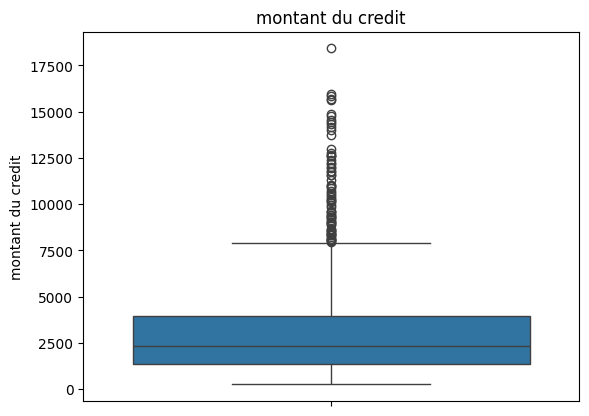

In [ ]:
#traçons les boxplots
import seaborn as sn
import matplotlib.pyplot as plt
sn.boxplot(german_credit_data['montant du credit'])

plt.title('montant du credit')
plt.show()

plt.show()

In [ ]:
##les valeurs aberrantes par la methodes de z-score
lim_sup=german_credit_data['montant du credit'].mean()+3*german_credit_data['montant du credit'].std()

lim_inf=german_credit_data['montant du credit'].mean()-3*german_credit_data['montant du credit'].std()

val_aber=german_credit_data.loc[(german_credit_data['montant du credit']>lim_sup)| (german_credit_data['montant du credit']<lim_inf),:]
val_aber

,Age,Sex,Job,Housing,compte d'epargne,compte courant,montant du credit,duree,but
18,44,female,3,free,little,moderate,12579,24,car
63,25,male,2,own,little,moderate,14421,48,business
87,47,male,2,free,moderate,moderate,12612,36,education
95,58,male,2,rent,little,moderate,15945,54,business
105,39,male,3,own,little,moderate,11938,24,vacation/others
236,23,male,0,own,NaN,moderate,14555,6,car
272,36,male,3,free,NaN,moderate,12169,48,car
274,34,male,1,own,little,little,11998,30,repairs
373,63,male,3,free,NaN,NaN,13756,60,car
374,60,female,3,free,moderate,moderate,14782,60,vacation/others


In [ ]:
##bonne base sans les valeurs aberrantes
german_credit=german_credit_data[(german_credit_data['montant du credit']>lim_inf)&(german_credit_data['montant du credit']<lim_sup)]
german_credit

,Age,Sex,Job,Housing,compte d'epargne,compte courant,montant du credit,duree,but
0,67,male,2,own,NaN,little,1169,6,radio/TV
1,22,female,2,own,little,moderate,5951,48,radio/TV
2,49,male,1,own,little,NaN,2096,12,education
3,45,male,2,free,little,little,7882,42,furniture/equipment
4,53,male,2,free,little,little,4870,24,car
...,...,...,...,...,...,...,...,...,...
995,31,female,1,own,little,NaN,1736,12,furniture/equipment
996,40,male,3,own,little,little,3857,30,car
997,38,male,2,own,little,NaN,804,12,radio/TV
998,23,male,2,free,little,little,1845,45,radio/TV


In [ ]:
# Supprimer les colonnes spécifiques
german_credit = german_credit.drop(columns=['Housing', 'compte courant', 'compte d\'epargne', 'but'])


german_credit


,Age,Sex,Job,montant du credit,duree
0,67,1,2,1169,6
1,22,0,2,5951,48
2,49,1,1,2096,12
3,45,1,2,7882,42
4,53,1,2,4870,24
...,...,...,...,...,...
995,31,0,1,1736,12
996,40,1,3,3857,30
997,38,1,2,804,12
998,23,1,2,1845,45


In [ ]:
##renommer##
# Remplacer 'Femme' par 0 et 'Homme' par 1 dans la colonne 'Genre'
german_credit['Sex'] = german_credit['Sex'].replace({'female': 0, 'male': 1})


In [ ]:
german_credit

,Age,Sex,Job,montant du credit,duree
0,67,1,2,1169,6
1,22,0,2,5951,48
2,49,1,1,2096,12
3,45,1,2,7882,42
4,53,1,2,4870,24
...,...,...,...,...,...
995,31,0,1,1736,12
996,40,1,3,3857,30
997,38,1,2,804,12
998,23,1,2,1845,45


##**visualisation de donnees**

In [ ]:
##voir les lignes et les colonnes##

german_credit.shape

(975, 5)

In [ ]:
##valeur existentielle daans job
german_credit['Job'].value_counts()

,count
Job,
2,622
1,199
3,133
0,21


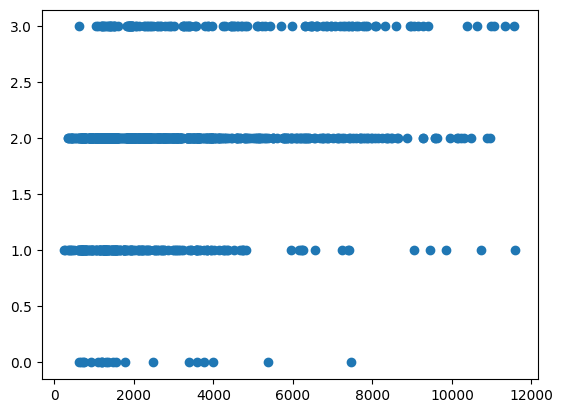

In [ ]:
###visuaalisation

from matplotlib import pyplot as plt

plt.scatter(german_credit['montant du credit'],german_credit['Job'])

plt.show()

In [ ]:
###importer la library k-means##
from sklearn.cluster import KMeans

In [ ]:
##definir le model k-means##
model=KMeans(n_clusters=4)

##entrainer le modele dans la dataset ##
model.fit(german_credit)

##predire les nouvelles classes##
model.predict(german_credit)

array([1, 3, 1, 2, 3, 2, 0, 3, 0, 3, 1, 0, 1, 1, 1, 1, 0, 2, 0, 1, 0, 0,
       1, 1, 1, 1, 1, 0, 3, 1, 0, 3, 1, 1, 3, 3, 1, 1, 1, 0, 1, 3, 3, 3,
       1, 0, 1, 2, 1, 0, 3, 1, 0, 1, 1, 3, 2, 1, 3, 1, 1, 1, 0, 3, 1, 1,
       1, 0, 2, 1, 1, 3, 1, 1, 0, 3, 2, 0, 3, 1, 1, 1, 0, 1, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 0, 0, 3, 1, 0, 1, 1, 0, 3, 3, 2, 1, 1, 1, 3, 2, 1,
       0, 3, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 2, 3, 0, 1, 2, 1, 2,
       1, 0, 1, 1, 3, 0, 0, 0, 0, 1, 1, 3, 1, 1, 1, 3, 2, 3, 1, 1, 1, 0,
       1, 0, 1, 1, 2, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 2, 0, 1, 1, 1, 2,
       3, 1, 0, 1, 1, 3, 1, 1, 0, 3, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 3,
       1, 1, 2, 1, 1, 3, 1, 0, 0, 3, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 3,
       0, 2, 2, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 3, 1, 0, 1, 1, 1,
       1, 1, 1, 0, 1, 0, 1, 2, 0, 1, 0, 1, 1, 1, 3, 0, 1, 1, 3, 1, 2, 1,
       0, 1, 0, 0, 0, 1, 3, 1, 0, 1, 1, 1, 0, 2, 3, 2, 1, 1, 1, 2, 3, 3,
       2, 2, 3, 1, 0, 0, 1, 0, 1, 1, 2, 1, 3, 1, 1,

In [ ]:
##inertie intraclasse

model.inertia_

411594372.7078783

In [ ]:
##position des centroides

model.cluster_centers_

array([[3.47633333e+01, 7.16666667e-01, 1.91000000e+00, 3.11952667e+03,
        2.23733333e+01],
       [3.55511482e+01, 6.38830898e-01, 1.75365344e+00, 1.35022338e+03,
        1.42922756e+01],
       [3.58800000e+01, 7.06666667e-01, 2.22666667e+00, 8.72916000e+03,
        3.63733333e+01],
       [3.64958678e+01, 7.85123967e-01, 2.16528926e+00, 5.69918182e+03,
        3.00743802e+01]])

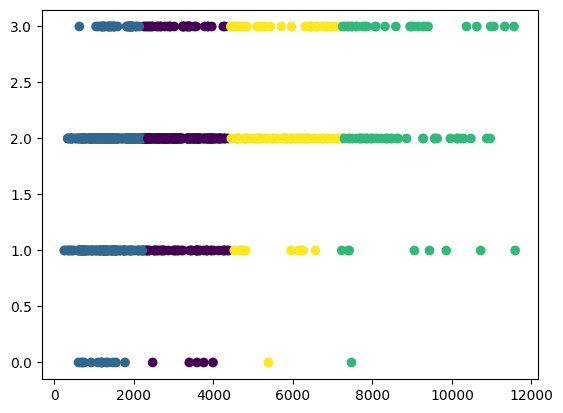

In [ ]:
##visualisation avec des groupes predites avec la variable Job
from matplotlib import pyplot as plt

plt.scatter(german_credit['montant du credit'],german_credit['Job'],c=model.predict(german_credit))

plt.show()

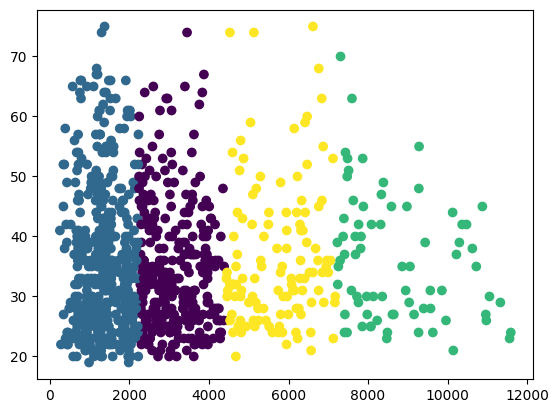

In [ ]:
##visualisation avec des groupes predites avec la variable
from matplotlib import pyplot as plt

plt.scatter(german_credit['montant du credit'],german_credit['Age'],c=model.predict(german_credit))

plt.show()

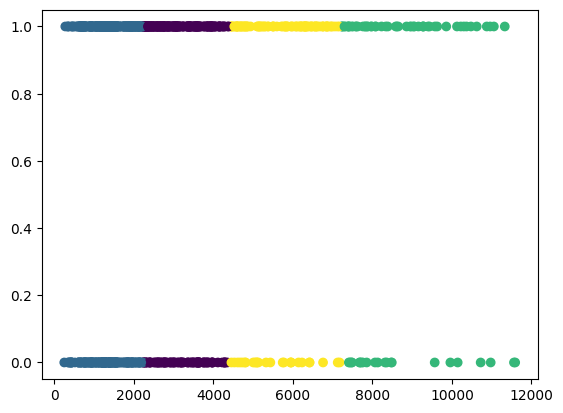

In [ ]:
##visualisation avec des groupes predites avec la variable Sex
from matplotlib import pyplot as plt

plt.scatter(german_credit['montant du credit'],german_credit['Sex'],c=model.predict(german_credit))

plt.show()

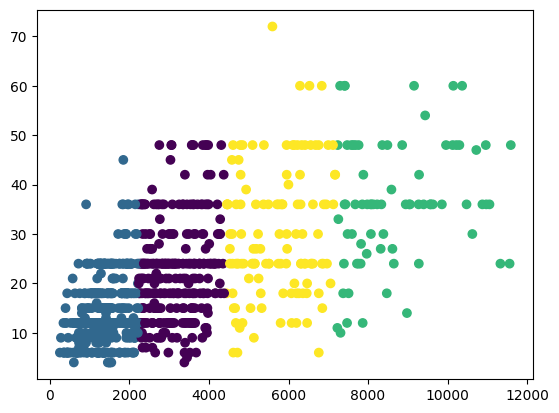

In [ ]:
##visualisation avec des groupes predites avec la variable duree
from matplotlib import pyplot as plt

plt.scatter(german_credit['montant du credit'],german_credit['duree'],c=model.predict(german_credit))

plt.show()

In [ ]:
#centrage et reduction
from sklearn import preprocessing
german_credit_cr=preprocessing.scale(german_credit)
german_credit_cr

array([[ 2.7906033 ,  0.67631287,  0.17207228, -0.80438216, -1.24664351],
       [-1.18981672, -1.4786056 ,  0.17207228,  1.29417574,  2.38035839],
       [ 1.19843529,  0.67631287, -1.38135805, -0.39757263, -0.72850038],
       ...,
       [ 0.22544373,  0.67631287,  0.17207228, -0.96456066, -0.72850038],
       [-1.10136294,  0.67631287,  0.17207228, -0.50772278,  2.12128683],
       [-0.74754783,  0.67631287,  0.17207228,  0.69076355,  2.12128683]])

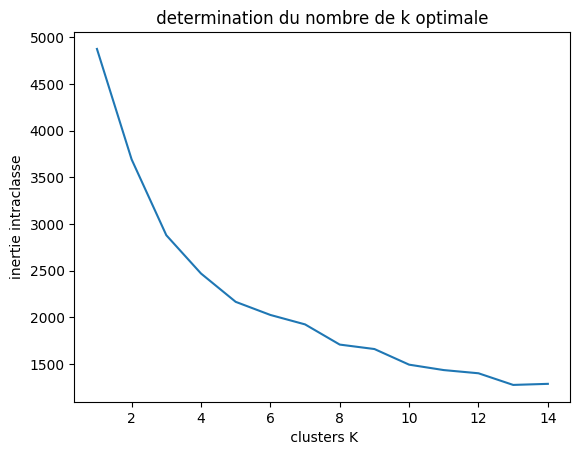

In [ ]:
##chercher le cas optimal

##liste vide
inertie=[]


#### generer des entiers ####
gener=range(1,15)


for i in gener:
    ########### construitre le mpodéle de kmeans et l'entrainer dans le dataset X




    models=KMeans(n_clusters=i).fit(german_credit_cr)
    ####### ajouter linertie de chaque classe dans la liste
    inertie.append(models.inertia_)



plt.plot(gener,inertie)
plt.xlabel(' clusters K')
plt.ylabel('inertie intraclasse')
plt.title(" determination du nombre de k optimale ")
plt.show()

In [ ]:
##modelisons avec le k-optimal=5
##definir le model k-means##
model=KMeans(n_clusters=4)

##entrainer le modele dans la dataset fromage_cr##
model.fit(german_credit_cr)

##predire les nouvelles classes##
model.predict(german_credit_cr)

array([3, 0, 1, 0, 3, 0, 3, 0, 3, 0, 2, 0, 2, 3, 2, 1, 3, 0, 2, 3, 3, 1,
       3, 2, 1, 1, 2, 2, 0, 2, 2, 0, 3, 2, 0, 0, 2, 2, 2, 2, 2, 1, 0, 0,
       2, 0, 1, 1, 2, 1, 0, 2, 2, 3, 1, 3, 0, 2, 0, 2, 3, 3, 2, 3, 2, 2,
       2, 2, 0, 1, 3, 0, 3, 3, 0, 3, 0, 2, 0, 3, 1, 1, 1, 2, 2, 2, 2, 3,
       3, 1, 2, 3, 3, 2, 0, 0, 1, 2, 2, 2, 2, 0, 2, 0, 2, 2, 2, 1, 0, 2,
       0, 0, 2, 2, 2, 2, 2, 1, 3, 2, 2, 1, 2, 2, 2, 0, 0, 1, 3, 0, 2, 0,
       3, 2, 1, 1, 0, 2, 2, 2, 0, 2, 3, 0, 3, 3, 2, 0, 0, 0, 2, 3, 1, 3,
       1, 2, 2, 2, 3, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 3, 3, 2, 3, 0,
       0, 1, 3, 2, 2, 3, 1, 2, 2, 3, 0, 0, 2, 0, 2, 2, 2, 2, 3, 3, 1, 0,
       2, 1, 0, 3, 2, 0, 3, 2, 1, 3, 3, 3, 1, 2, 0, 1, 3, 1, 2, 2, 2, 2,
       0, 0, 3, 2, 2, 0, 1, 2, 1, 1, 2, 3, 2, 3, 2, 3, 0, 2, 1, 2, 3, 2,
       2, 2, 1, 1, 2, 2, 2, 0, 1, 2, 2, 1, 2, 3, 0, 1, 1, 2, 0, 2, 0, 2,
       2, 2, 0, 2, 2, 1, 2, 2, 2, 3, 1, 3, 2, 0, 0, 0, 3, 3, 2, 0, 0, 0,
       0, 0, 2, 1, 3, 2, 1, 0, 1, 3, 0, 2, 1, 1, 2,

In [ ]:
##afficher les differents types de groupes

##index tries les groupes
import numpy as np

idk=np.argsort(model.labels_) ##model.labels c'est ce que le modele a predit ##np.argsort permet de trier les indices d'un tableau de facon croissant

##affichage des observationt et leur groupes
dd=pd.DataFrame(german_credit.index[idk],model.labels_[idk])
dd

,0
0,999
0,813
0,812
0,808
0,242
...,...
3,798
3,800
3,246
3,354


In [ ]:
##ajouter la variables classes
german_credit['classe']=model.predict(german_credit_cr)
german_credit['classe']

,classe
0,3
1,0
2,1
3,0
4,3
...,...
995,1
996,0
997,2
998,0


In [ ]:
german_credit

,Age,Sex,Job,montant du credit,duree,classe
0,67,1,2,1169,6,3
1,22,0,2,5951,48,0
2,49,1,1,2096,12,1
3,45,1,2,7882,42,0
4,53,1,2,4870,24,3
...,...,...,...,...,...,...
995,31,0,1,1736,12,1
996,40,1,3,3857,30,0
997,38,1,2,804,12,2
998,23,1,2,1845,45,0


In [ ]:
moy = pd.DataFrame(german_credit)
# Calculer la moyenne pour chaque classe par rapport à chaque variable
moyennes_par_classe = moy.groupby('classe').mean()

# Afficher le résultat
moyennes_par_classe

,Age,Sex,Job,montant du credit,duree
classe,,,,,
0,34.021164,0.798942,2.206349,6455.486772,37.285714
1,35.605128,0.641026,0.892308,1966.466667,15.082051
2,29.161836,0.584541,2.111111,2140.632850,16.758454
3,51.519774,0.853107,2.129944,2469.677966,16.943503


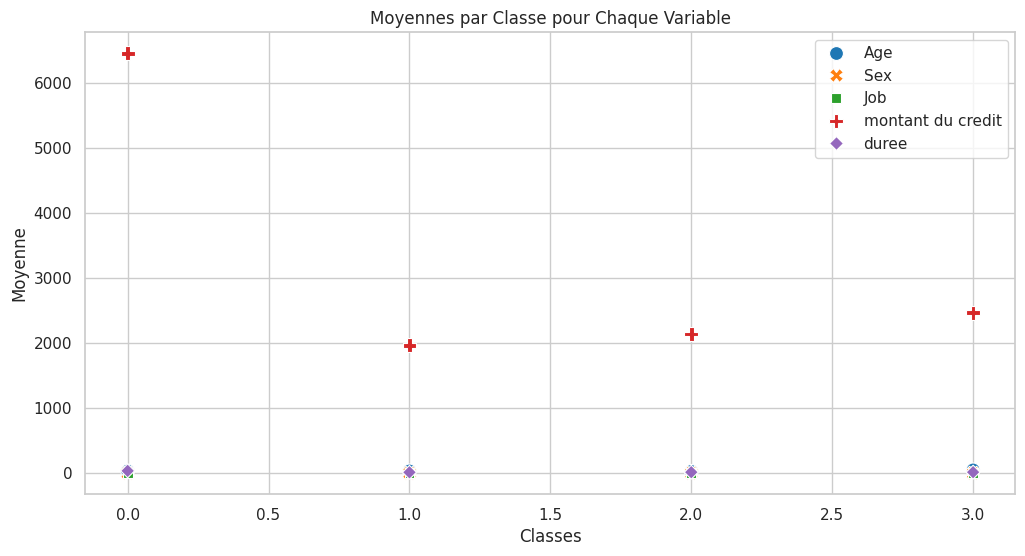

In [ ]:

import matplotlib.pyplot as plt
import seaborn as sns


# Utiliser seaborn pour améliorer la visibilité du graphique
sns.set(style="whitegrid")

# Tracer le graphique en utilisant un point pour chaque classe
plt.figure(figsize=(12, 6))
sns.scatterplot(data=moyennes_par_classe, palette="tab10", s=100)
plt.title('Moyennes par Classe pour Chaque Variable')
plt.xlabel('Classes')
plt.ylabel('Moyenne')
plt.show()

## conclusion